# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import re
from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import ttest_ind
import seaborn as sn
import numpy as np
RANDOM_SEED = 42
pd.set_option('display.max_columns', 150)

Загружаем и объединяем датасеты.

In [2]:
main_task = pd.read_csv(r'B:\SKILL_FACTORY\main_task.csv')
kaggle_task = pd.read_csv(r'B:SKILL_FACTORY\kaggle_task.csv')
df = main_task.append(kaggle_task, sort=False).reset_index(drop=True)

Restaurant_id — идентификационный номер ресторана / сети ресторанов;

City — город, в котором находится ресторан;

Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;

Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;

Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);

Price Range — диапазон цен в ресторане;

Number of Reviews — количество отзывов о ресторане;

Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;

URL_TA — URL страницы ресторана на TripAdvosor;

ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [3]:
display(df)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
49995,id_9995,London,"['Caribbean', 'Barbecue', 'Jamaican', 'Vegetar...",4367.0,NaN,$,28.0,[['By far best Chicken burgers and wings in L....,/Restaurant_Review-g186338-d11916827-Reviews-C...,d11916827
49996,id_9996,Lisbon,"['Indian', 'Asian', 'Nepali', 'Bangladeshi']",2612.0,NaN,$$ - $$$,2.0,"[['Ok indian food'], ['11/25/2017']]",/Restaurant_Review-g189158-d12701633-Reviews-C...,d12701633
49997,id_9997,Milan,NaN,5562.0,NaN,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d13198194-Reviews-Q...,d13198194
49998,id_9998,Milan,['Italian'],4010.0,NaN,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d3862815-Reviews-La...,d3862815


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        32639 non-null  object 
 6   Number of Reviews  46800 non-null  float64
 7   Reviews            49998 non-null  object 
 8   URL_TA             50000 non-null  object 
 9   ID_TA              50000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.8+ MB


# В данном датасете имеется:

3 числовых признака

7 строковых признака

Датасет состоит из 50000 строк, в датасете 10 колонок.

In [5]:
df.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Rating               10000
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
dtype: int64

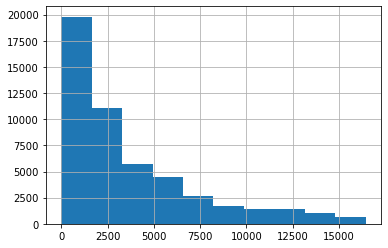

In [6]:
df['Ranking'].hist()

Из гистограммы можно увидеть,что существенная часть ресторанов входит в топ 5000 мест.

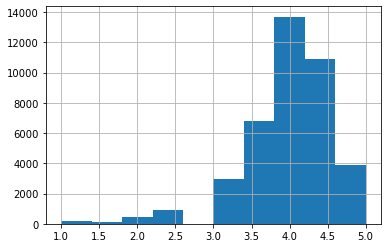

In [7]:
df['Rating'].hist()

Существенная часть ресторанов имеет нормальное растределение от 3 до 5, лишь некоторая от 1 до 2.5.

In [8]:
df['City'].value_counts().head(10)

London       7193
Paris        6108
Madrid       3813
Barcelona    3395
Berlin       2705
Milan        2694
Rome         2589
Prague       1816
Lisbon       1647
Vienna       1443
Name: City, dtype: int64

Из всех стран, представленных в датасете, можно выделить 5 стран, где количество ресторанов больше, чем в других странах 

[London, Paris, Madrid, Barcelona, Berlin].

In [9]:
def price_range(row):
    '''Функция по замене символов на более понятные значения'''

    if row == '$':
        return 1
    elif row == '$$ - $$$':
        return 2
    else:
        return 3

In [10]:
def row_to_time(row):
    '''Функция по приведению строки в единый формат даты и вычисление разницы между датами'''
    if row == '[]': return None
    if len(row) == 0:return None
    if len(row) == 1:
        return datetime.now() - pd.to_datetime(row).max()
    if len(row) == 2:
        return pd.to_datetime(row).max() - pd.to_datetime(row).min()

In [11]:
def add_dummies(df, column):
    '''Функция по добавлению в датафрейм dummie-переменных'''

    dummies = pd.get_dummies(df[column], prefix=column)
    return df.join(dummies)

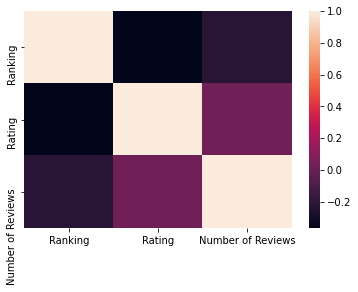

In [12]:
sn.heatmap(df[['Ranking','Rating','Number of Reviews']].corr())

In [13]:
df[['Ranking','Rating','Number of Reviews']].corr()

,Ranking,Rating,Number of Reviews
Ranking,1.000000,-0.368371,-0.223775
Rating,-0.368371,1.000000,0.030964
Number of Reviews,-0.223775,0.030964,1.000000


Исходя из таблицы корреляции:
сильнее всего коррелирует целевой признак с признаком "Ranking", так как чем меньше место (чем ближе к 1), тем выше рейтинг.

# Price Range

In [14]:
df['Price Range'].unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

Не учитывая пропущенных значений мы имеем 3 уникальных значения, можно их поменять на более понятные для восприятия значения.

Можно заменить эти символы на:

low  - низкая стоимость - 1

middle - средняя стоимость - 2

high - высокая стоимость - 3

In [15]:
df['Price Range'] = df['Price Range'].dropna().apply(lambda x: price_range(x))

In [16]:
df['Price Range'].value_counts()

2.0    23041
1.0     7816
3.0     1782
Name: Price Range, dtype: int64

Замена символов на более понятные значения благодаря функции price_range(), и заполнение None значений на 'middle', так как 'middle' значение является самым частым.

In [17]:
df['Price Range'] = df['Price Range'].fillna(2)

Создание dummy-колонок из колонки ['Price Range']

# Cuisine Style

Создание dummy-переменных самых популярных видов кухонь и подсчёт их поличества.

In [18]:
df['Cuisine Style'] = df['Cuisine Style'].dropna().apply(lambda x: x[1:-1].replace("'",'').replace(' ','').split(','))

In [19]:
top_list = df['Cuisine Style'].explode().dropna().value_counts()[:4].index

In [20]:
df['Cuisine Style'] = df['Cuisine Style'].fillna('no_info')

In [21]:
#for i in top_list:
#    df[i] = df['Cuisine Style'].apply(lambda x: 1 if i in x else 0)

In [22]:
df['Cuisine_Count'] = df['Cuisine Style'].apply(lambda x: 0 if x == 'no_info' else len(x))

In [23]:
df = df.drop(['Cuisine Style'], axis=1)

# Reviews

In [24]:
df['Days_Between_Reviews'] = df['Reviews'].str.findall('\d+/\d+/\d+').fillna('[]')
df['Days_Between_Reviews'] = df['Days_Between_Reviews'].apply(lambda x: None if len(x) == 0 else x)
df['len_dates'] = df['Days_Between_Reviews'].dropna().apply(lambda x: len(x))

In [25]:
df['len_dates'].value_counts()

2.0    36204
1.0     5680
3.0        4
Name: len_dates, dtype: int64

Можно увидеть, что обзоров, где содержатся 3 даты всего четыре штуки

In [26]:
df.loc[df['len_dates'] == 3]['Reviews'].iloc[0]

"[['The desserts arcade !', 'Visit today 3/1/2017'], ['06/02/2017', '01/03/2017']]"

Похоже,что дата была написана в отзыве, а сответственно некоторые из них дублируются, поэтому их количесво больше.

Соответственно, у каждого списка дат, нужно убрать 1й элемент.

In [27]:
df.loc[df['len_dates']==3]['Days_Between_Reviews'].apply(lambda x: x.pop(0))

9254      3/1/2017
23348    29/9/2016
42221     21/10/17
43809    30/5/2017
Name: Days_Between_Reviews, dtype: object

In [28]:
df.loc[df['len_dates']==3]['Days_Between_Reviews']

9254     [06/02/2017, 01/03/2017]
23348    [09/30/2016, 08/25/2016]
42221    [12/22/2017, 10/19/2017]
43809    [04/13/2017, 05/30/2017]
Name: Days_Between_Reviews, dtype: object

In [29]:
df['len_dates'] = df['Days_Between_Reviews'].dropna().apply(lambda x: len(x))

In [30]:
df['len_dates'].value_counts()

2.0    36208
1.0     5680
Name: len_dates, dtype: int64

Теперь переведём наши даты в формат даты и заменим пропущенные значения.

In [31]:
df['Days_Between_Reviews'] = df['Days_Between_Reviews'].dropna().apply(lambda x: row_to_time(x)).dt.days

In [32]:
df['Days_Between_Reviews'] = df['Days_Between_Reviews'].fillna(0)

Создадим колонку со средним количеством слов в отзывах

In [33]:
df['len_dates'] = df['len_dates'].fillna(0)

In [34]:
df['mean_words_reviews'] = (df['Reviews'].fillna('[]').str.findall('[a-zA-Z]+').apply(lambda x: len(x)) / df['len_dates']).fillna(0)

In [35]:
df = df.drop(['len_dates', 'Reviews'], axis=1)

# Number of Reviews

In [36]:
df['Number of Reviews'].describe()

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

Заполним пропущенные значения отзывов медианой.

In [37]:
df['Number of Reviews'] = df['Number of Reviews'].fillna(round(df['Number of Reviews'].mean()))

# ID_TA

Изменим записи идентификатора ресторана и переделаем их в число.

In [38]:
df['ID_TA'] = df['ID_TA'].str[1:]
df['ID_TA'] = df['ID_TA'].astype(float)
type(df['ID_TA'].iloc[0])

numpy.float64

# City

Разделим колонку 'City' на 3 группы:

Часто встречаемые

Средне встречаемые

Редко встречаемые

In [39]:
df['City'].describe()

count      50000
unique        31
top       London
freq        7193
Name: City, dtype: object

In [40]:
high_freq = df['City'].value_counts()[0:10].index
average_freq = df['City'].value_counts()[10:20].index
low_freq = df['City'].value_counts()[20:].index

In [41]:
df['high_city_freq'] = df['City'].apply(lambda x: 1 if x in high_freq else 0)
df['average_city_freq'] = df['City'].apply(lambda x: 1 if x in average_freq else 0)
df['low_city_freq'] = df['City'].apply(lambda x: 1 if x in low_freq else 0)

In [42]:
df = df.drop(['City'],axis = 1)

# Restaurant_id

Из id ресторана оставим только номер 

In [43]:
df['Restaurant_id'] = df['Restaurant_id'].apply(lambda x: float(x[3:]))

In [44]:
df['Rating'] = df['Rating'].fillna(0)

# Осмотр данных

In [45]:
df.isna().sum()

Restaurant_id           0
Ranking                 0
Rating                  0
Price Range             0
Number of Reviews       0
URL_TA                  0
ID_TA                   0
Cuisine_Count           0
Days_Between_Reviews    0
mean_words_reviews      0
high_city_freq          0
average_city_freq       0
low_city_freq           0
dtype: int64

In [46]:
df = df.drop(['URL_TA'], axis=1)

In [57]:
df

,Restaurant_id,Ranking,Rating,Price Range,Number of Reviews,ID_TA,Cuisine_Count,Days_Between_Reviews,mean_words_reviews,high_city_freq,average_city_freq,low_city_freq
0,5569.0,5570.0,3.5,2.0,194.0,1912643.0,3,41.0,4.5,1,0,0
1,1535.0,1537.0,4.0,2.0,10.0,7992032.0,0,382.0,2.5,0,1,0
2,352.0,353.0,4.5,3.0,688.0,8632781.0,7,2.0,3.0,1,0,0
3,3456.0,3458.0,5.0,2.0,3.0,1358776.0,0,0.0,0.0,1,0,0
4,615.0,621.0,4.0,2.0,84.0,6864963.0,3,272.0,7.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9995.0,4367.0,0.0,1.0,28.0,11916827.0,4,122.0,5.5,1,0,0
49996,9996.0,2612.0,0.0,2.0,2.0,12701633.0,4,1037.0,3.0,1,0,0
49997,9997.0,5562.0,0.0,2.0,2.0,13198194.0,0,0.0,0.0,1,0,0
49998,9998.0,4010.0,0.0,2.0,2.0,3862815.0,1,0.0,0.0,1,0,0


In [48]:
df.corr()

,Restaurant_id,Ranking,Rating,Price Range,Number of Reviews,ID_TA,Cuisine_Count,Days_Between_Reviews,mean_words_reviews,high_city_freq,average_city_freq,low_city_freq
Restaurant_id,1.000000,0.825090,-0.257137,-0.020504,-0.178652,0.039769,-0.255471,0.096721,-0.061623,0.404913,-0.274226,-0.242954
Ranking,0.825090,1.000000,-0.109897,-0.026334,-0.214359,0.049756,-0.315655,0.116448,-0.076674,0.491809,-0.335171,-0.292408
Rating,-0.257137,-0.109897,1.000000,-0.012176,0.011001,0.049589,0.032704,-0.012905,0.008976,-0.007808,-0.000011,0.011479
Price Range,-0.020504,-0.026334,-0.012176,1.000000,0.112717,-0.061790,-0.029695,-0.010813,-0.049762,-0.025908,0.032862,-0.004093
Number of Reviews,-0.178652,-0.214359,0.011001,0.112717,1.000000,-0.272539,0.384727,-0.136611,0.079711,0.048060,-0.041783,-0.016996
ID_TA,0.039769,0.049756,0.049589,-0.061790,-0.272539,1.000000,-0.252374,0.001931,-0.177299,-0.017993,0.010632,0.012787
Cuisine_Count,-0.255471,-0.315655,0.032704,-0.029695,0.384727,-0.252374,1.000000,-0.261350,0.197478,-0.026606,-0.012750,0.055415
Days_Between_Reviews,0.096721,0.116448,-0.012905,-0.010813,-0.136611,0.001931,-0.261350,1.000000,0.198677,0.003225,0.007291,-0.014084
mean_words_reviews,-0.061623,-0.076674,0.008976,-0.049762,0.079711,-0.177299,0.197478,0.198677,1.000000,-0.050454,0.018819,0.049956
high_city_freq,0.404913,0.491809,-0.007808,-0.025908,0.048060,-0.017993,-0.026606,0.003225,-0.050454,1.000000,-0.743629,-0.514904


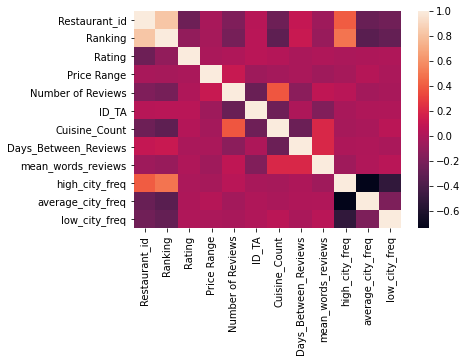

In [49]:
sn.heatmap(df.corr())

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [50]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating'], axis = 1)
y = df['Rating']

In [51]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [52]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [53]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [54]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [55]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.34883879999999995


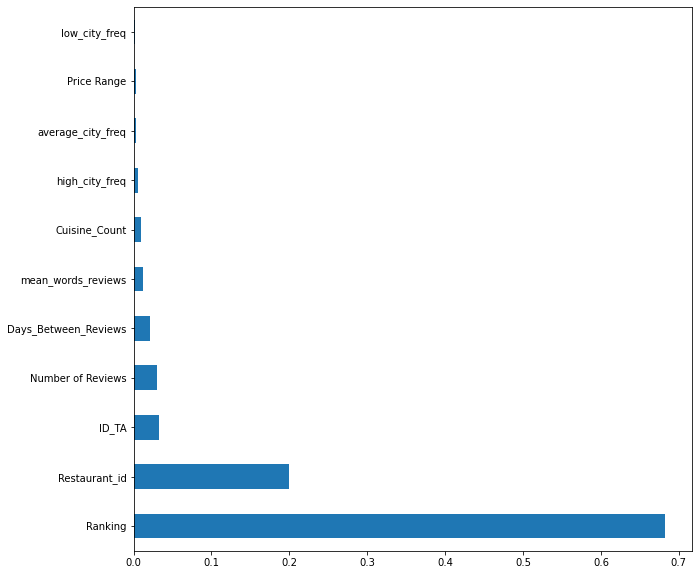

In [56]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')